In [1]:
#Importing the libraries
import pandas as pd
#To make DataReader working otherwise it won't due to compatibility error
pd.core.common.is_list_like = pd.api.types.is_list_like 
import numpy as np

#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as pdr
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

Questions:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

1.) What was the change in price of the stock over time?

In [2]:
#Company list
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Setting up the timeframe
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

# Extract data using Robinhood API

all_prices_ = data.get_data_robinhood((tech_list), start = start,end = end)

In [3]:
all_prices_.head(10)

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-09-01  161.606500  162.483200         False  161.192800   
       2017-09-05  159.665800  161.803500         False  158.168500   
       2017-09-06  159.498400  160.562300         False  158.129100   
       2017-09-07  158.858100  159.823500         False  157.971500   
       2017-09-08  156.267200  158.749700         False  156.168700   
       2017-09-11  159.094500  159.636300         False  157.508500   
       2017-09-12  158.464000  161.517800         False  156.405100   
       2017-09-13  157.272000  157.577400         False  155.558000   
       2017-09-14  155.922400  157.025800         False  155.735300   
       2017-09-15  157.498600  158.572400         False  155.646600   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-09-01  162.345300     reg  16591051  
       2017-09-05  161.311000     reg  29468495  
       2017-09-06  160.286500     reg  21651726  
       2017-09-07  159.675700     reg  21928502  
       2017-09-08  158.464000     reg  28611535  
       2017-09-11  158.109400     reg  31580798  
       2017-09-12  160.187900     reg  71714046  
       2017-09-13  157.488800     reg  44907361  
       2017-09-14  156.621900     reg  23760749  
       2017-09-15  156.109600     reg  49114602

In [4]:
columns = ['close_price','high_price','low_price','open_price','volume']

In [5]:
for company in tech_list:
    print(company)
    globals()[company] = all_prices_.loc[company]

AAPL
GOOG
MSFT
AMZN


In [6]:
for column in columns:
        AAPL[column] = AAPL[column].replace(",",".").astype("float")
for column in columns:
        GOOG[column] = GOOG[column].replace(",",".").astype("float")
for column in columns:
        MSFT[column] = MSFT[column].replace(",",".").astype("float")
for column in columns:
        AMZN[column] = AMZN[column].replace(",",".").astype("float")

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

In [7]:
AMZN.dtypes

close_price     float64
high_price      float64
interpolated       bool
low_price       float64
open_price      float64
session          object
volume          float64
dtype: object

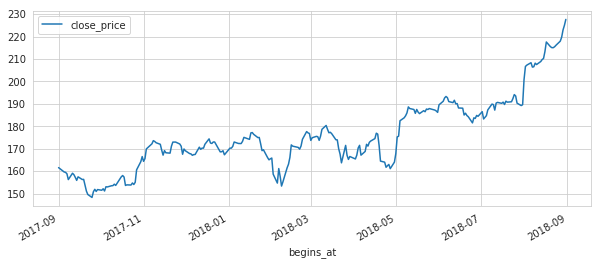

In [8]:
# Let's see a historical view of the closing price
AAPL['close_price'].plot(legend=True,figsize=(10,4))

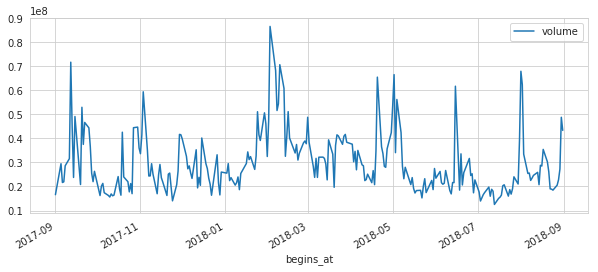

In [9]:
#Let's see the volume trades
AAPL['volume'].plot(legend=True,figsize = (10,4))

In [10]:
#Creating a list of the movering average days
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for {} days".format(ma)
    AAPL[column_name]= AAPL['close_price'].rolling(ma).mean()

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-09-01 to 2018-08-31
Data columns (total 10 columns):
close_price       252 non-null float64
high_price        252 non-null float64
interpolated      252 non-null bool
low_price         252 non-null float64
open_price        252 non-null float64
session           252 non-null object
volume            252 non-null float64
MA for 10 days    243 non-null float64
MA for 20 days    233 non-null float64
MA for 50 days    203 non-null float64
dtypes: bool(1), float64(8), object(1)
memory usage: 19.9+ KB


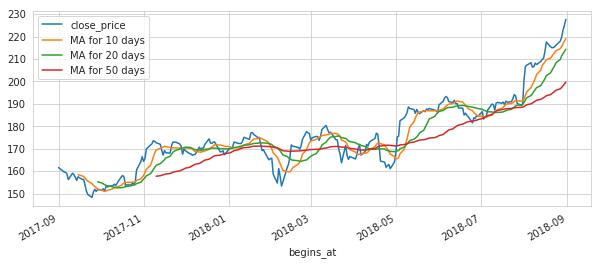

In [12]:
#Let's plot everything
AAPL[['close_price','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,legend=True,figsize=(10,4))

    2.) What was the daily return of the stock on average?

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


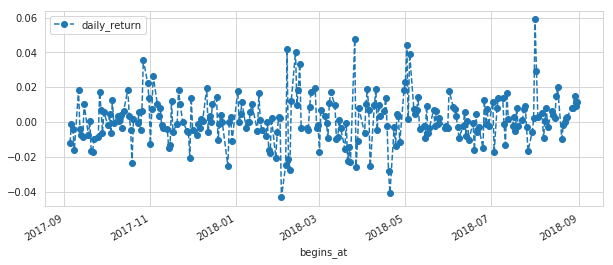

In [13]:
AAPL['daily_return'] = AAPL['close_price'].pct_change()#pct_change to have the value in percent
AAPL['daily_return'].plot(legend=True, figsize=(10,4),linestyle="--",marker="o")

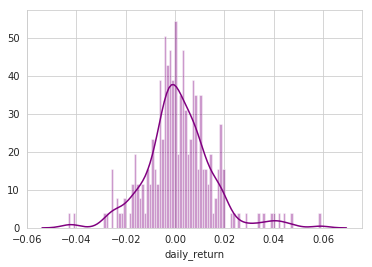

In [14]:
sns.distplot(AAPL['daily_return'].dropna(),bins=100,color="purple")

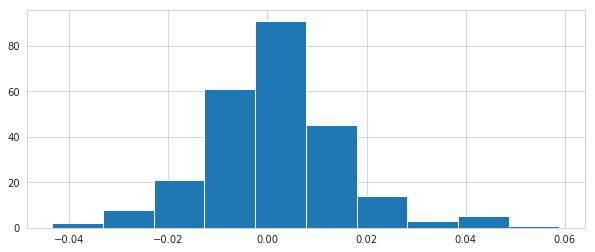

In [15]:
#Using pandas instead of Seaborn
AAPL['daily_return'].hist(figsize=(10,4))

In [16]:
#Having every closing price in one DataFrame
closing_df = pd.DataFrame(data.get_data_robinhood((tech_list), start = start,end = end)['close_price'])

In [17]:
closing_df.head(10)

close_price
symbol begins_at             
AAPL   2017-09-01  161.606500
       2017-09-05  159.665800
       2017-09-06  159.498400
       2017-09-07  158.858100
       2017-09-08  156.267200
       2017-09-11  159.094500
       2017-09-12  158.464000
       2017-09-13  157.272000
       2017-09-14  155.922400
       2017-09-15  157.498600

In [18]:
#Processing the closing_df to be able to analyse it
closing_df.reset_index(drop=False,inplace=True)

In [19]:
closing_df = closing_df.pivot(index='begins_at', columns='symbol', values='close_price')

In [21]:
for i in tech_list:
        closing_df[i] = closing_df[i].replace(",",".").astype("float")
        pd.DataFrame(closing_df)

In [23]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [24]:
tech_rets.head(10)

symbol,AAPL,AMZN,GOOG,MSFT
begins_at,,,,
2017-09-01,NaN,NaN,NaN,NaN
2017-09-05,-0.012009,-0.013269,-0.009484,-0.004462
2017-09-06,-0.001048,0.002621,-0.000689,-0.002853
2017-09-07,-0.004014,0.012058,0.008773,0.012806
2017-09-08,-0.016310,-0.013854,-0.010097,-0.004842
2017-09-11,0.018093,0.012486,0.002785,0.010544
2017-09-12,-0.003963,0.004724,0.003218,-0.001070
2017-09-13,-0.007522,0.017322,0.003240,0.007097
2017-09-14,-0.008581,-0.007393,-0.010673,-0.005850


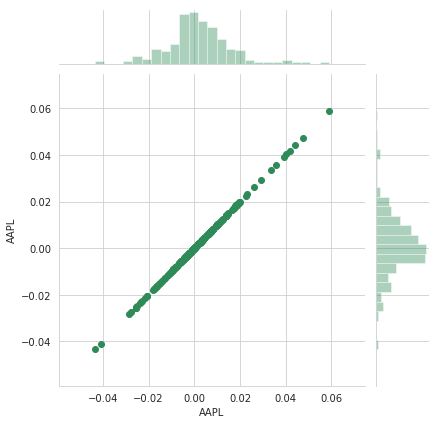

In [25]:
#let's plot them!
sns.jointplot('AAPL','AAPL',tech_rets,kind = 'scatter',color = 'seagreen')

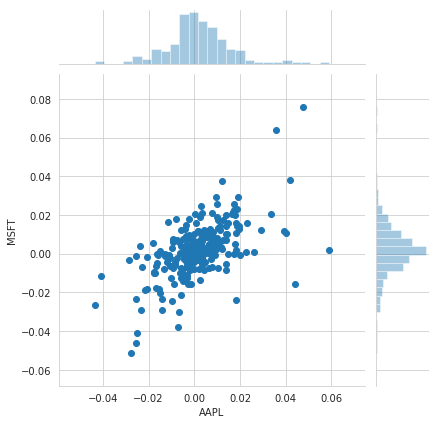

In [26]:
#Compare two companies
sns.jointplot('AAPL','MSFT',tech_rets,kind = 'scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

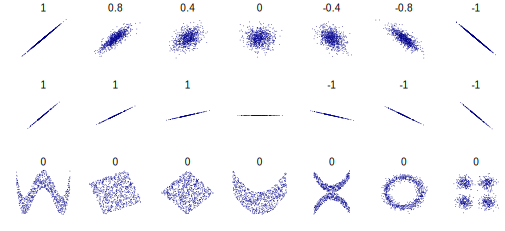

In [27]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

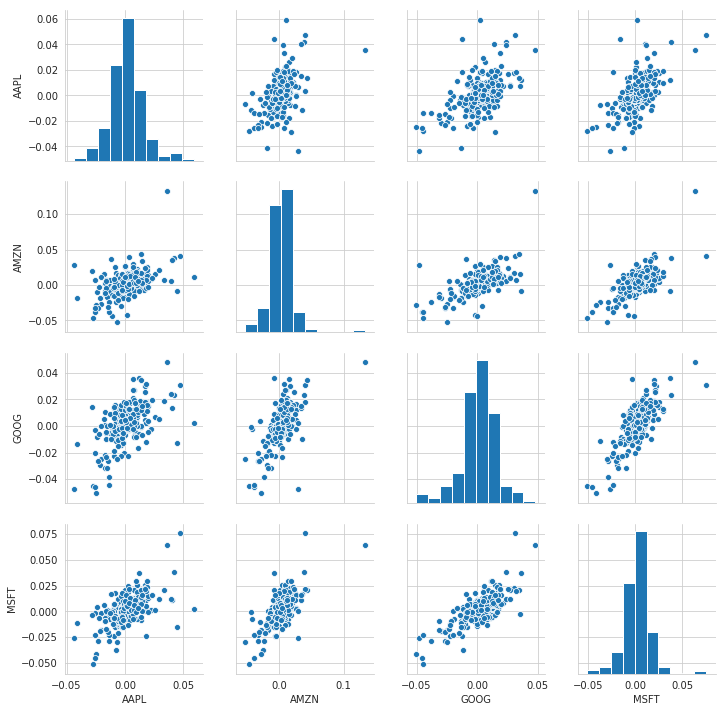

In [28]:
#To see the correlation between all the companies 
sns.pairplot(tech_rets.dropna())

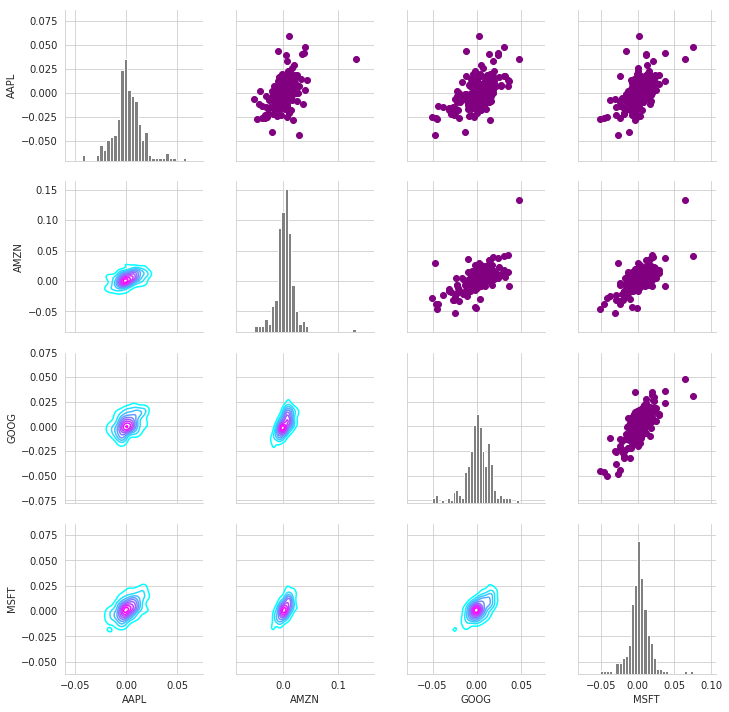

In [29]:
#Testing pairGrid to control the figures with tech_rets
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool")

returns_fig.map_diag(plt.hist,color="grey",bins=30)

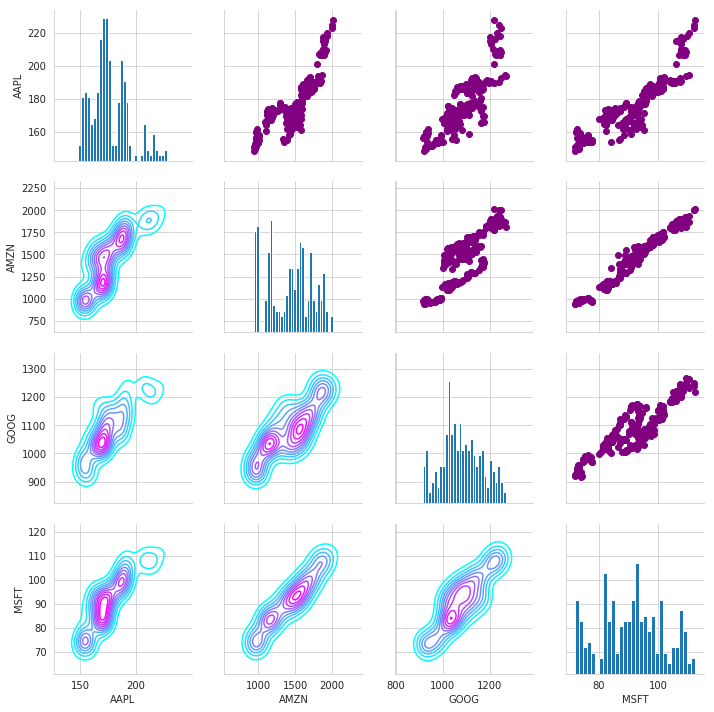

In [30]:
#Testing pairGrid to control the figures with closing_df
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter, color="purple")

returns_fig.map_lower(sns.kdeplot,cmap="cool")

returns_fig.map_diag(plt.hist,bins=30)

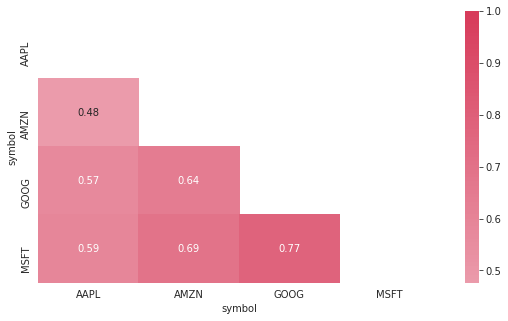

In [61]:
#Correlation for the daily returns
corr = tech_rets.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(9,5))
cmap = sns.diverging_palette(360, 5, as_cmap=True)
sns.heatmap(corr,center = 0,annot=True,mask=mask,cmap=cmap)


Risk Analysis



There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.


In [92]:
rets.mean().max()

0.0030167097786081556

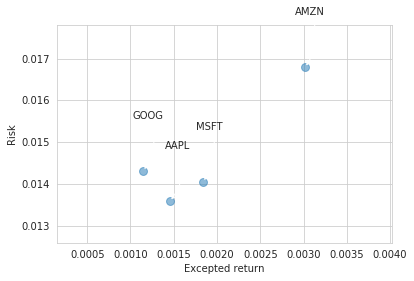

In [97]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.scatter(rets.mean(),rets.std(),s = area, alpha=0.5)

plt.ylim(rets.std().min()-0.001,rets.std().max()+0.001)
plt.xlim(rets.mean().min()-0.001,rets.mean().max()+0.001)

plt.xlabel("Excepted return")
plt.ylabel("Risk")


# http://matplotlib.org/users/annotations_guide.html
for label,x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=-0.3'))


Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.


For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

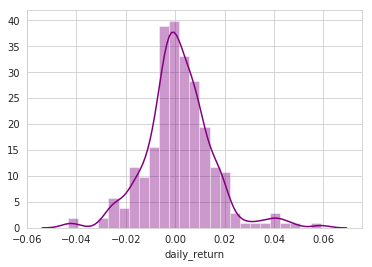

In [98]:
sns.distplot(AAPL['daily_return'].dropna(),color="purple")

In [100]:
rets['AAPL'].quantile(0.05)

-0.020720672296469955

The 0.05 empirical quantile of daily returns is at -0.019. That means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019 * 1,000,000 = $19,000.

In [125]:
for i in tech_list:
    print("For {}, the empirical quantile of daily returns is ".format(i) + str(rets[i].quantile(0.05)))

For AAPL, the empirical quantile of daily returns is -0.020720672296469955
For GOOG, the empirical quantile of daily returns is -0.024029496494085534
For MSFT, the empirical quantile of daily returns is -0.020784993961582177
For AMZN, the empirical quantile of daily returns is -0.023892758205169395


With 95% confidence, our worst daily loss will not exceed "rets[i].quantile(0.05)  * 100"%.
So, if we have a 1 million dollar investment, our one-day 5% VaR are:

0.020720672296469955 * 1,000,000 = $20720 for APPLE

0.24029496494085534 * 1,000,000 = $24029 for GOOGLE

0.20784993961582177 * 1,000,000 = $20784 for MICROSOFT

0.23892758205169395 * 1,000,000 = $23892 for AMAZON


Value at Risk using the Monte Carlo method


In [126]:
# Setting up our time horizon
days = 365

# The delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [132]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [128]:
GOOG.head()

,close_price,high_price,interpolated,low_price,open_price,session,volume
begins_at,,,,,,,
2017-09-01,937.34,942.480,False,935.15,941.13,reg,947374.0
2017-09-05,928.45,937.000,False,921.96,933.08,reg,1326432.0
2017-09-06,927.81,930.915,False,919.27,930.15,reg,1527650.0
2017-09-07,935.95,936.410,False,923.62,931.73,reg,1212743.0
2017-09-08,926.50,936.990,False,924.88,936.49,reg,1011538.0


Text(0.5,1,'Monte Carlo Analysis for Google')

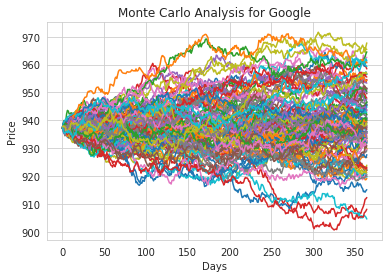

In [133]:
start_price = 937.34


for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [134]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

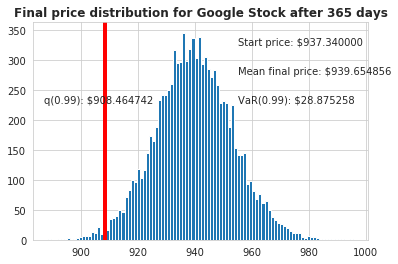

In [141]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=100)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: ${:2f}".format(start_price))

# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: ${:2f}".format(simulations.mean()))

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): ${:2f}".format(start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): ${:2f}".format(q))

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after {} days".format(days), weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $28.87 for every investment of 937.34 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $28.87 at risk 99% of the time from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future possible stock prices.
